# Balt Detector

### We begin by importing some libraries

In [2]:
import joblib
import numpy as np
import os
import random
from skimage.io import imread
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

### Next, we load the training data

In [4]:
data_path_NotBald = 'Dataset/Train/NotBald/'
data_path_Bald = 'Dataset/Train/Bald/'

list_NotBald = os.listdir(data_path_NotBald)
list_Bald = os.listdir(data_path_Bald)

max_train_elements = 1000
count = 0

listall = []
classes = []

for x in list_NotBald:
    count += 1
    if count > max_train_elements:
        break
    try:
        img = imread(data_path_NotBald + x)
        listall.append(img)
        classes.append(0)  # Bald or Bald spot
    except (IOError, ValueError) as e:
        print('Unable to read', x, ':', e, 'so skipping it')

count = 0
for x in list_Bald:
    count += 1
    if count > max_train_elements:
        break
    try:
        img = imread(data_path_Bald + x)
        listall.append(img)
        classes.append(1)  # Not Bald
    except (IOError, ValueError) as e:
        print('Unable to read', x, ':', e, 'so skipping it')

Unable to read .DS_Store : Could not find a backend to open `Dataset/Train/Bald/.DS_Store`` with iomode `ri`. so skipping it


### Now we do the reshape

In [5]:
listall = np.asarray(listall)
classes = np.asarray(classes)

listshape = listall.shape
print(listshape)
listshape = listall.reshape(len(classes), -1)

x = listshape # the images 
y = classes # the labels (0 et 1)

(1999, 218, 178, 3)


### Normalization

In [7]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
joblib.dump(clf.fit(x, y), 'training-save', compress=0, protocol=None, cache_size=None)

clf = joblib.load('training-save', mmap_mode=None)

### Training

In [6]:
y_pred = clf.predict(x)

### Confusion Matrix

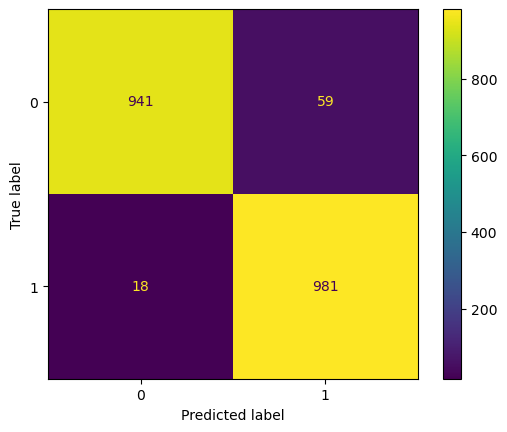

In [7]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Accuracy Score Calculation

In [8]:
score = accuracy_score(y, y_pred, normalize=True)
print("Accuracy score :", round(score*100, 2), "%")

Accuracy score : 96.15 %


### Testing the Model

❗️ The person in the photo is bald or has a bald spot.


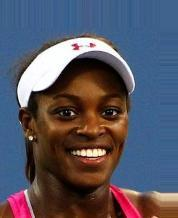

In [35]:
random_photo = random.choice(list_NotBald + list_Bald)
random_photo_path = data_path_NotBald + random_photo if random_photo in list_NotBald else data_path_Bald + random_photo

test_image = imread(random_photo_path)
test_image = test_image.reshape(1, -1)

prediction = clf.predict(test_image)

if prediction == 0:
    print("✅ The person in the photo is not bald.")
else:
    print("❗️ The person in the photo is bald or has a bald spot.")

from IPython.display import Image, display
display(Image(filename=random_photo_path))